#### Importing the neccessary libraries for analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
#Loading the Data into the fashion_df Dataframe
fashion_df = tf.keras.datasets.fashion_mnist.load_data()

In [12]:
#Splitting the Data using Test and training sets.
(X_train, y_train), (X_test, y_test) = fashion_df

In [11]:
#Viewing the shape of the initial Dataframe split into Training and Testing sets
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### EDA by initially plotting the data and viewing its contents.

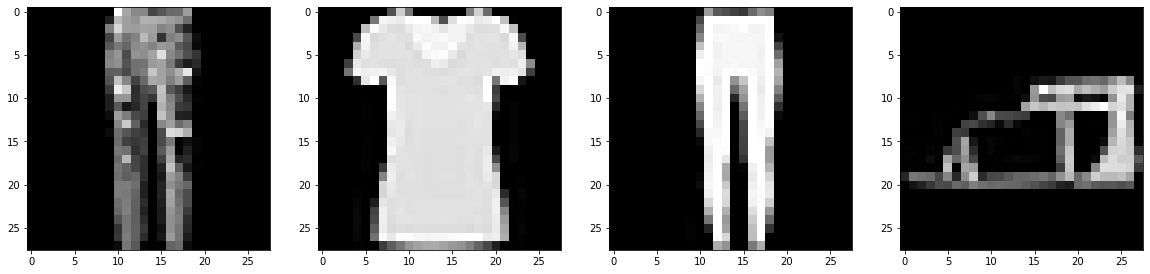

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[115].reshape(28,28), cmap="gray")

plt.subplot(142)
plt.imshow(X_train[225].reshape(28,28), cmap="gray")

plt.subplot(143)
plt.imshow(X_train[330].reshape(28,28), cmap="gray")

plt.subplot(144)
plt.imshow(X_train[435].reshape(28,28), cmap="gray")

plt.show()

In [6]:
X_train = X_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_test = y_test.astype('float32') / 255

#X_train = to_categorical(X_train)
#X_test = to_categorical(X_test)
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

### Model Creation with 5 hidden layers

We begin to create a function which will produce the results using 5 hidden layers. This function will allow us to specify specific parameters we can test with.

In [7]:
def nn_model(First, Second, Third, Fourth, batch_, opt, act):

    model = Sequential()

    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(First, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(Second, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(Third, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(Fourth, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(10, activation='softmax'))
    
    print(model.summary())
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=opt),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, batch_size=batch_, epochs=20, verbose=1, 
              validation_data=[X_test, y_test])
    
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score:{}'.format(score[0])) #
    print('Test Accuracy:{}'.format(score[1])) 
    

In [8]:
nn_model(512, 256, 128, 64, 1, .001, 'relu')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
____

In [10]:
nn_model(512, 256, 128, 64, 8, 1, 'sigmoid')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [13]:
nn_model(256, 128, 64, 8, 4, .001, 'sigmoid')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

In [14]:
nn_model(256, 128, 64, 8, 4, .001, 'relu')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)               

### Model Creation with 3 hidden layers

Next we begin the creation of a model with 3 hidden laters. A function was also created in order to easily specify certain parameters we want to use.

In [16]:
def nn_model_3(First, Second, Third, batch_, opt, act):

    model = Sequential()

    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(First, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(Second, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(Third, activation=act))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(Dense(10, activation='softmax'))
    
    print(model.summary())
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=opt),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, batch_size=batch_, epochs=20, verbose=1, 
              validation_data=[X_test, y_test])
    
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score:{}'.format(score[0])) #
    print('Test Accuracy:{}'.format(score[1])) 
    

In [17]:
nn_model_3(512, 256, 128, 8, 1, 'sigmoid')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)              

In [18]:
nn_model_3(256, 128, 64, 4, .001, 'sigmoid')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)               

In [19]:
nn_model_3(256, 128, 64, 4, .001, 'sigmoid')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)               

#### Summary

Amongsts the models we tried above, we used 3 and 5 hidden layers with 2 with different batch sizes and optimizers. Initially between 3 and 5 hidden layers, we noticed that more of our models performed better with 3 hidden layers and does not overvit compared to 5 layers.

Additionally with an __Accuracy of 79% and a Score of 57%__ our __last model perfomed the best__. This model contains the following parameters.

3 hidden layers with 256, 128 and 64 neurons
Batch size of  4 
learing rate of .001 
Optimizer used was 'sigmoid'